In [3]:
import torch
import math
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

# Tensors

Tensor is a multi-dimensional generalization of a matrix, allowing us to have multidimensional arrays of structured data. We can do mathematical operations on them without knowing what each of the dimensions represents semantically.

They can also be simpler structures like vectors.

![Tensors](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

### Tensor operations

### Construction

```python
torch.tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) → Tensor
```

Constructs a tensor with data.

Parameters:
* data (array_like) – Initial data for the tensor. Can be a list, tuple, NumPy ndarray, scalar, and other types.

Keyword arguments:
* dtype (torch.dtype, optional) – the desired data type of returned tensor. Default: if None, infers data type from data.

* device (torch.device, optional) – the desired device of returned tensor. Default: if None, uses the current device for the default tensor type (see torch.set_default_tensor_type()). device will be the CPU for CPU tensor types and the current CUDA device for CUDA tensor types.

* requires_grad (bool, optional) – If autograd should record operations on the returned tensor. Default: False.

* pin_memory (bool, optional) – If set, returned tensor would be allocated in the pinned memory. Works only for CPU tensors. Default: False.

In [4]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [5]:
torch.tensor([0, 1])

tensor([0, 1])

In [6]:
torch.tensor([[0.11111, 0.222222, 0.3333333]],
    dtype=torch.float64,
    device=torch.device('cuda:0'))

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [7]:
torch.tensor(3.14159)

tensor(3.1416)

In [8]:
torch.tensor([])

tensor([])

In [9]:
x = torch.tensor([1,2,3,4],dtype=torch.float32)
x.requires_grad_(requires_grad=True)
y = torch.tensor([1, 1, 1, 1],dtype=torch.float32,requires_grad=True) # tensor y 
z = x * y
z = z.mean()
z.backward() 
x.grad

tensor([0.2500, 0.2500, 0.2500, 0.2500])

### Concatenation

```python
torch.cat(tensors, dim=0, *, out=None) → Tensor
```

Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty.


Parameters:
* tensors (sequence of Tensors) – any python sequence of tensors of the same type. Non-empty tensors provided must have the same shape, except in the cat dimension.

* dim (int, optional) – the dimension over which the tensors are concatenated

Keyword arguments:
* out (Tensor, optional) – the output tensor.

In [10]:
x = torch.randn(2, 3)
x

tensor([[ 9.3915e-01,  7.7298e-01,  3.1318e-01],
        [-6.3672e-01, -8.4798e-04, -8.4901e-01]])

In [11]:
torch.cat((x, x, x), 0)

tensor([[ 9.3915e-01,  7.7298e-01,  3.1318e-01],
        [-6.3672e-01, -8.4798e-04, -8.4901e-01],
        [ 9.3915e-01,  7.7298e-01,  3.1318e-01],
        [-6.3672e-01, -8.4798e-04, -8.4901e-01],
        [ 9.3915e-01,  7.7298e-01,  3.1318e-01],
        [-6.3672e-01, -8.4798e-04, -8.4901e-01]])

In [12]:
a = torch.ones(2,2)
b = torch.zeros(1,2)
torch.cat((a, b))

tensor([[1., 1.],
        [1., 1.],
        [0., 0.]])

### Reshape

```python
torch.reshape(input, shape) → Tensor
```

Returns a tensor with the same data and number of elements as input, but with the specified shape. When possible, the returned tensor will be a view of input. Otherwise, it will be a copy. Contiguous inputs and inputs with compatible strides can be reshaped without copying, but you should not depend on the copying vs. viewing behavior.

Parameters:
* input (Tensor) – the tensor to be reshaped

* shape (tuple of python:ints) – the new shape

In [13]:
a = torch.arange(4.)
a

tensor([0., 1., 2., 3.])

In [14]:
torch.reshape(a, (2, 2))

tensor([[0., 1.],
        [2., 3.]])

In [15]:
b = torch.tensor([[0, 1], [2, 3]])
torch.reshape(b, (-1,))

tensor([0, 1, 2, 3])

### Unbind

```python
torch.unbind(input, dim=0) → seq
```

Removes a tensor dimension.

Parameters:
* input (Tensor) – the tensor to unbind
* dim (int) – dimension to remove

In [16]:
torch.unbind(torch.tensor([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]]))

(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9]))

In [17]:
a, b = torch.unbind(torch.tensor([[1, 2, 3],[3,4,5]]))
a, b

(tensor([1, 2, 3]), tensor([3, 4, 5]))

### Clamp

```python
torch.clamp(input, min=None, max=None, *, out=None) → Tensor
```

Clamps all elements in input into the range [ min, max ]. Letting min_value and max_value be min and max, respectively, this returns:

$ y_i = min(max(x_i, min\_value_i), max\_value_i) $

If min is None, there is no lower bound. Or, if max is None there is no upper bound.

Parameters:
* input (Tensor) – the input tensor.
* min (Number or Tensor, optional) – lower-bound of the range to be clamped to
* max (Number or Tensor, optional) – upper-bound of the range to be clamped to

Keyword arguments:
* out (Tensor, optional) – the output tensor.

In [18]:
a = torch.randn(4)
a

tensor([ 1.1985,  1.1200, -1.9467,  0.2847])

In [19]:
torch.clamp(a, min=-0.5, max=0.5)

tensor([ 0.5000,  0.5000, -0.5000,  0.2847])

In [20]:
a = torch.randn(5)
b = torch.empty_like(a)
a, b

(tensor([-0.3199,  1.1072, -1.1806,  0.0032, -0.6625]),
 tensor([0., 0., 0., 0., 0.]))

In [21]:
torch.clamp(a, 0.2, 0.6, out=b)
b

tensor([0.2000, 0.6000, 0.2000, 0.2000, 0.2000])

# Gradients

Gradient is simply a vector listing the derivatives of a function with respect to each argument of the function.

On setting requires_grad = True, Tensors start forming a backward graph that tracks every operation applied on them to calculate the gradients using something called a dynamic computation graph.

**Backpropagation:** used to calculate the gradients of the loss keeping the input weights to later update the weights and reduce loss.

Steps for training a neural network:
* Choose architecture
* Forward propagation
* Calculate loss
* Back propgation
* Update weights

The change in the loss for a small change in an input weight is called the gradient of that weight and is calculated using backpropagation. The gradient is then used to update the weight using a learning rate to overall reduce the loss and train the neural net.


![Cost function](https://github.com/rasbt/python-machine-learning-book/raw/master/faq/closed-form-vs-gd/ball.png)

Slope of the angle of our cost function at our current location determines if we are adjusting correctly. A negative slope tells us we are headed downward, which is good because we want to find minima, while a positive slope says that our previous step has overshot our goal (moved beyond the optimal and back up the other side of the function).

Derivative is the rate of change of a function. Descent indicates going to the bottom of a cost function using these changing gradients. To obtain derivatives a process of differentiation is used.

PyTorch includes an automatic differentiation package, *autograd*.

**Autograd:** engine used to calculate derivatives. It records a graph of all the operations performed on a gradient enabled tensor and creates an acyclic graph called the dynamic computational graph.

In [22]:
dtype = torch.float

In [23]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

In [24]:
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

In [25]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

99 3299.50341796875
199 2321.60791015625
299 1634.97265625
399 1152.6304931640625
499 813.65087890625
599 575.3258056640625
699 407.70220947265625
799 289.7626037597656
899 206.75177001953125
999 148.30621337890625
1099 107.14349365234375
1199 78.14442443847656
1299 57.70906066894531
1399 43.30474853515625
1499 33.14908218383789
1599 25.98724937438965
1699 20.935562133789062
1799 17.371597290039062
1899 14.856718063354492
1999 13.081809043884277


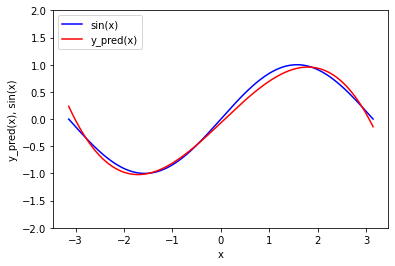

In [26]:
x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)
y_pred = a.item() + b.item()*x + c.item()*x**2 + d.item()*x**3

plt.ylim(-2,2)
plt.plot(x, y, "-b", label="sin(x)")
plt.plot(x, y_pred, "-r", label="y_pred(x)")
plt.xlabel("x")
plt.ylabel("y_pred(x), sin(x)")
plt.legend(loc="upper left")

# Neural network in Keras

In [27]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Dropout, MaxPooling2D, AveragePooling2D, Flatten, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist, cifar10
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [28]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:08:00.0, compute capability: 6.1



## Load Data

In [29]:
epochS=5
batch=128
lr0=1e-3

In [30]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

shapeI=trainX.shape[1:4]
ile_klas=trainY.shape[1]  #ile_klas

## Define model

Models in Keras are defined as a sequence of layers.

In [31]:
#feature extraction
model=Sequential()
model.add(Input(shape=shapeI))
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation('relu'))

#klasyfikator
model.add(Flatten())
model.add(Dense(ile_klas))
model.add(Activation('softmax'))

## Compile model

Compiling the model uses efficient numerical libraries. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In [32]:
opt = SGD(momentum=0.4, learning_rate=lr0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Fit model

Training a network means finding the best set of weights to map inputs to outputs in our dataset.

We can train or fit our model on our loaded data by calling the fit() function on the model.
Training occurs over epochs and each epoch is split into batches.
* Epoch: One pass through all of the rows in the training dataset.
* Batch: One or more samples considered by the model within an epoch before weights are updated.

In [33]:
h3 = model.fit(trainX, trainY, batch_size=batch, epochs=epochS)

Epoch 1/5
391/391 [==============================] - 5s 4ms/step - loss: 2.2258 - accuracy: 0.1784
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 2.0159 - accuracy: 0.3039
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 1.9287 - accuracy: 0.3343
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 1.8761 - accuracy: 0.3511
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 1.8469 - accuracy: 0.3634


## Evaluate model

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset.

In [34]:
loss, accuracy = model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 1.8243 - accuracy: 0.3695


## Make predictions

In [35]:
predictions = model.predict(testX)

In [36]:
nazwy = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=nazwy))

              precision    recall  f1-score   support

    airplane       0.42      0.51      0.46      1000
  automobile       0.47      0.35      0.40      1000
        bird       0.25      0.24      0.25      1000
         cat       0.26      0.26      0.26      1000
        deer       0.39      0.21      0.27      1000
         dog       0.35      0.31      0.33      1000
        frog       0.36      0.54      0.43      1000
       horse       0.39      0.38      0.38      1000
        ship       0.45      0.39      0.42      1000
       truck       0.38      0.51      0.44      1000

    accuracy                           0.37     10000
   macro avg       0.37      0.37      0.36     10000
weighted avg       0.37      0.37      0.36     10000



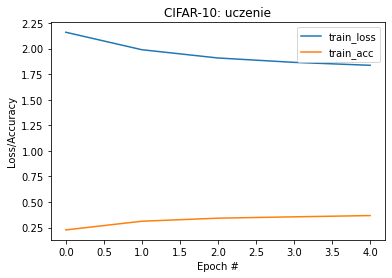

In [37]:
N = np.arange(0, epochS)
title = "CIFAR-10: uczenie"
plt.figure()
plt.plot(N, h3.history["loss"], label="train_loss")
plt.plot(N, h3.history["accuracy"], label="train_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Neural network in PyTorch

# Perceptron